# New York City Airbnb -- Hosts
 **Industry** : Housing<br>
 **Description**: Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world.  <br>

### Group 2 Members

* Nikhil Shankar  
* Jun He (Helena) 
* George 

### Research: **As an Airbnb host, how to optimize price?**

### Dataset Description

This dataset contains 48,895 entries, 16 columns. It includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.<br/>
**Key Attributes:**

* Listing Details: id, name
* Host Information: host_id, host_name, calculated_host_listings_count
* Location: neighbourhood_group (borough), neighbourhood, latitude, longitude
* Property Details: room_type (entire home, private room, etc.), price, minimum_nights
* Engagement Metrics: number_of_reviews, reviews_per_month, last_review
* Availability: availability_365 (days available in a year)


## Exploratory Data Analysis (EDA)
### Data Cleaning and Preparation

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [89]:
# Step 1: Data Loading
def load_data(file_path):
    """Load dataset from file_path."""
    data = pd.read_csv(file_path)
    return data

In [90]:
# Load the dataset
data = load_data('data/AB_NYC_2019.csv')
print("Initial Data Overview:\n", data.head(5))

Initial Data Overview:
      id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               

In [91]:
# Step 2: Data Cleaning
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [92]:
## Statistic
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Data Visualization 

c:\Users\DELL\Desktop\Conestoga\AIML\FoundationsMachineLearningFramework\Lab\venvs\CSCN8010_classical_ml_311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


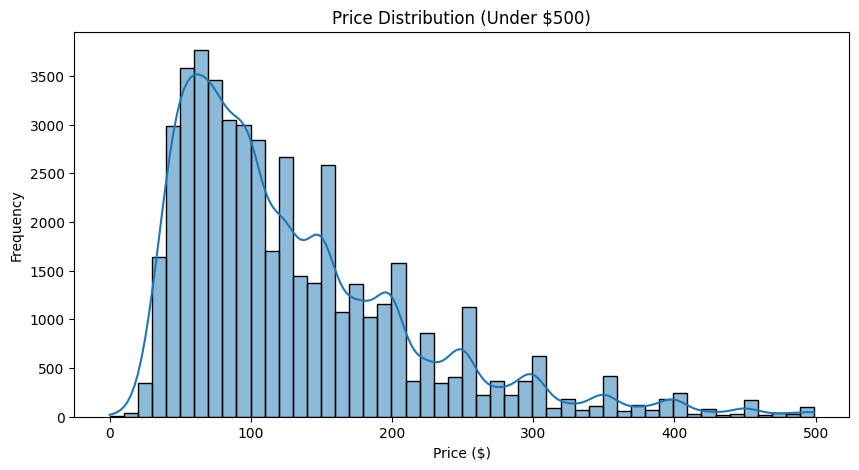

In [93]:
# Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data[data['price'] < 500]['price'], bins=50, kde=True)
plt.title("Price Distribution (Under $500)")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()

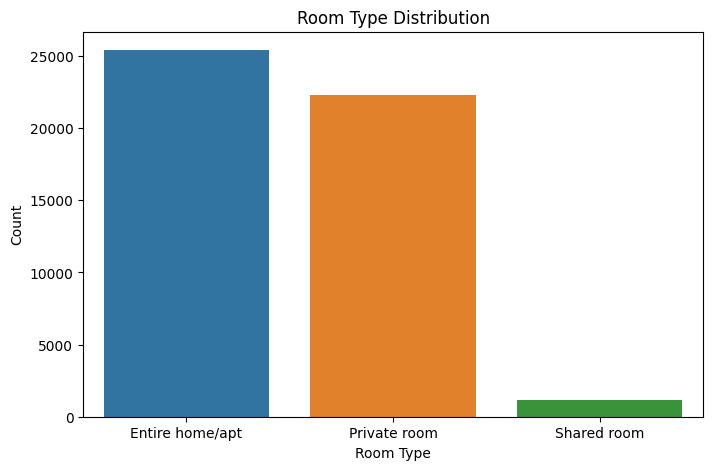

In [94]:
# Room type distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='room_type', data=data, order=data['room_type'].value_counts().index)
plt.title("Room Type Distribution")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.show()

#### **Hosts And Areas**

- Average reviews is 1-2 for all neighborhood groups.

##### **Hosts per location**

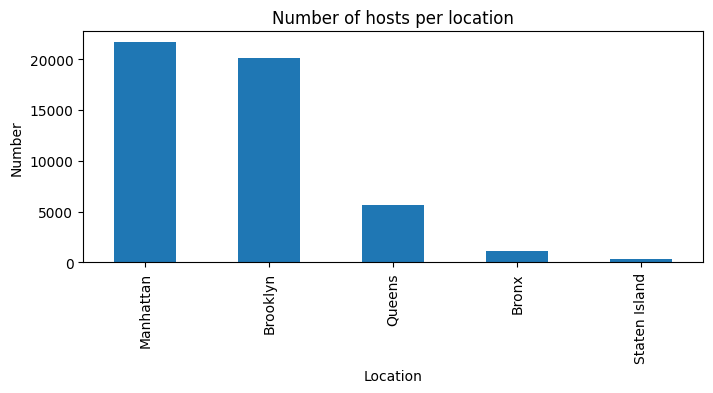

In [95]:
# Average reviews by location
plt.figure(figsize=(8, 3))
data["neighbourhood_group"].value_counts().plot(kind='bar')
plt.title("Number of hosts per location")
plt.xlabel("Location")
plt.ylabel("Number")
plt.show()

- Bronx and Staten Island have very low number of hosts. Need to examine if its because of lack of demand.
- Manhattan and Brooklyn have highest number almost 20X that of Bronx and Staten Island.

##### **Availability greater than 180**

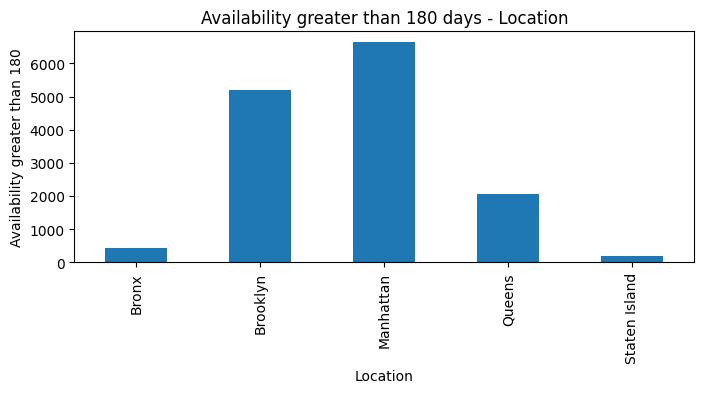

In [96]:
# Average reviews by location
plt.figure(figsize=(8, 3))
data[data["availability_365"] >= 180].groupby("neighbourhood_group")["availability_365"].count().plot(kind='bar')
plt.title("Availability greater than 180 days - Location")
plt.xlabel("Location")
plt.ylabel("Availability greater than 180")
plt.show()

- Hosts which have availability more than 180 days is least for Bronx and Staten Island.
- We can enquire more to find out specific time and month based data to figure out if there are non-availability in some specific months.


##### **Availability less than 180**

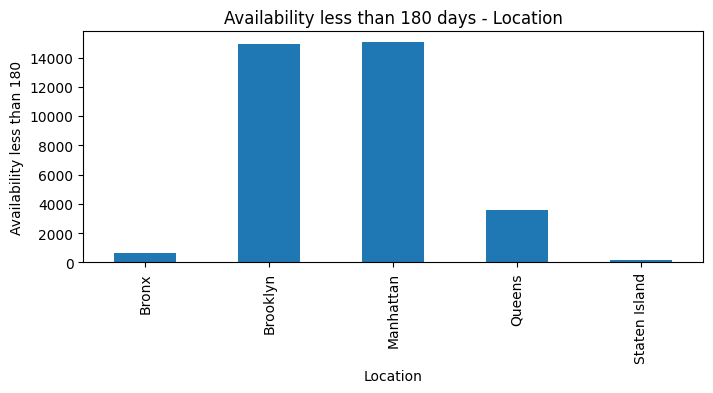

In [97]:
# Average reviews by location
plt.figure(figsize=(8, 3))
data[data["availability_365"] < 180].groupby("neighbourhood_group")["availability_365"].count().plot(kind='bar')
plt.title("Availability less than 180 days - Location")
plt.xlabel("Location")
plt.ylabel("Availability less than 180")
plt.show()

##### **Availability 365**

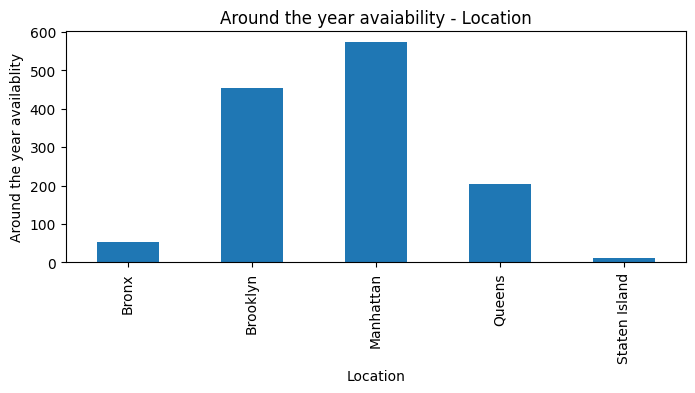

In [98]:
# Average reviews by location
plt.figure(figsize=(8, 3))
data[data["availability_365"] == 365].groupby("neighbourhood_group")["availability_365"].count().plot(kind='bar')
plt.title("Around the year avaiability - Location")
plt.xlabel("Location")
plt.ylabel("Around the year availablity")
plt.show()

- In staten Island and Bronx only less than 50 hosts have around the year availability.

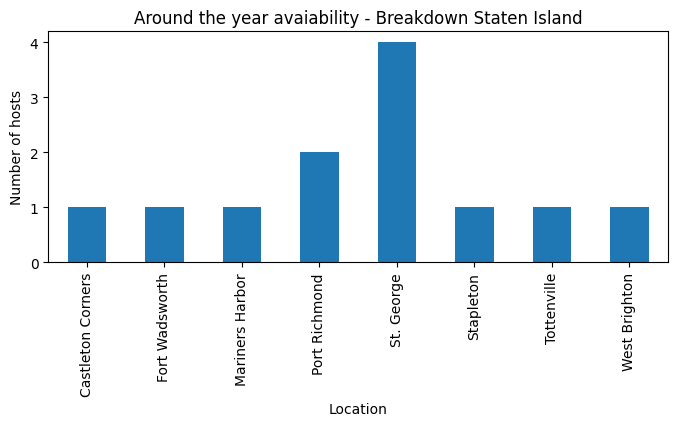

In [99]:
plt.figure(figsize=(8, 3))
data[(data["neighbourhood_group"] == "Staten Island") & (data["availability_365"] == 365)].groupby("neighbourhood")["availability_365"].count().plot(kind='bar')
plt.title("Around the year avaiability - Breakdown Staten Island")
plt.xlabel("Location")
plt.ylabel("Number of hosts")
plt.show()

- We can identify places which lack around the year availability 

#### **Price and Areas**

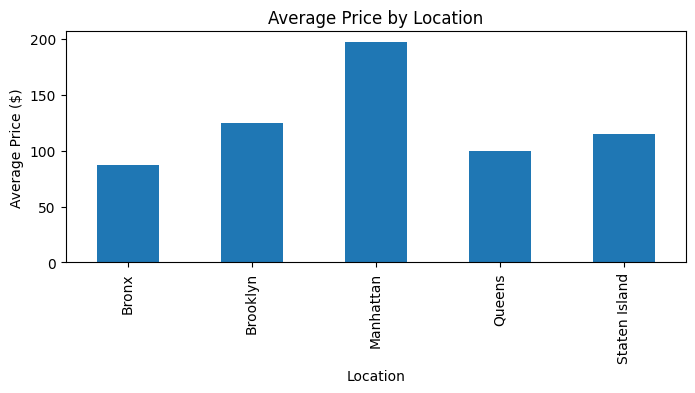

In [100]:
# Average price by location
plt.figure(figsize=(8, 3))
data.groupby("neighbourhood_group")['price'].mean().plot(kind='bar')
plt.title("Average Price by Location")
plt.xlabel("Location")
plt.ylabel("Average Price ($)")
plt.show()

- Manhattan has highest average price 
- Lowest is for Bronx
- The average price at Manhattan is almost double that of the lowest area Bronx.

#### **Reviews and Locations**

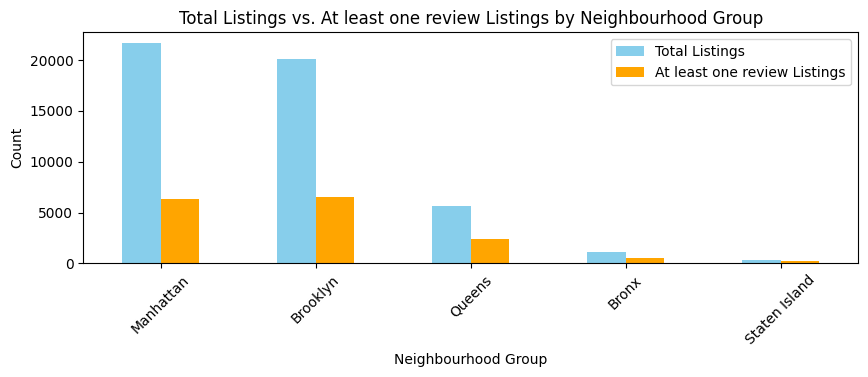

In [101]:
# Compute the counts
filtered_reviews = data[data["reviews_per_month"] > 1].groupby("neighbourhood_group")["reviews_per_month"].count()
total_listings = data["neighbourhood_group"].value_counts()

# Combine both series into a DataFrame
df = total_listings.to_frame(name="Total Listings").join(filtered_reviews.to_frame(name="High Review Listings"), how="left").fillna(0)

# Plot the combined data
df.plot(kind='bar', figsize=(10, 3), color=['skyblue', 'orange'])

# Customize labels and title
plt.title("Total Listings vs. At least one review Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.legend(["Total Listings", "At least one review Listings"])
plt.xticks(rotation=45)

# Show the plot
plt.show()

- There is high supply and low demand in Manhattan and Brooklyn. 
- We cant finalize this assumption until we figure out whether there are other reasons for low review counts in these areas.
- Queens, Bronx and Staten Island have atleast half review to listing ratio.

#### **Well Performing Hosts**

C:\Users\DELL\AppData\Local\Temp\ipykernel_1780\2397221701.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_data = sorted_data.groupby(["neighbourhood_group", "price_category"])["price"].count().unstack()


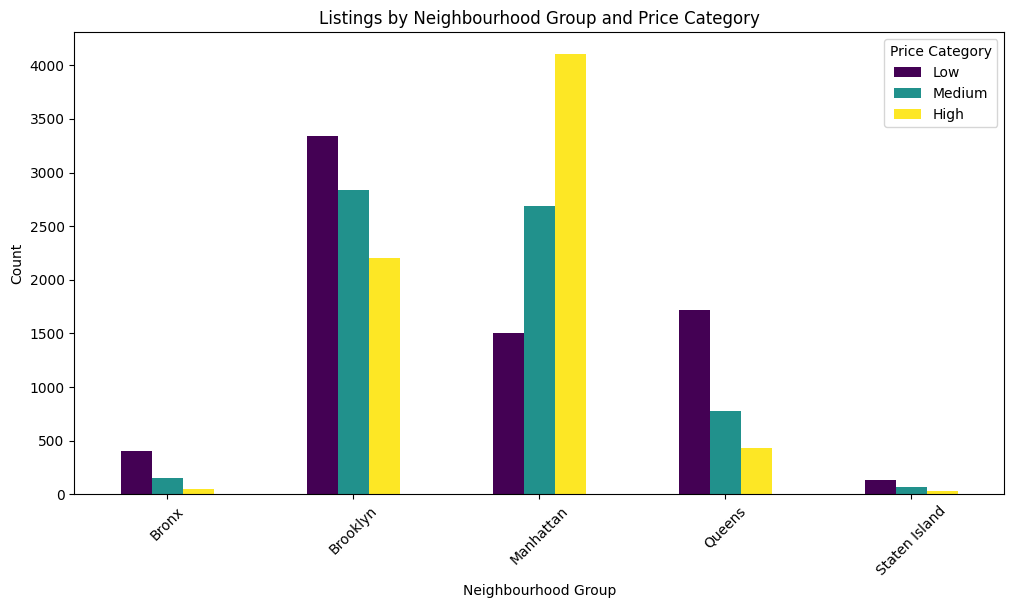

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta


#Prompt used
#I have 5 columns names 
#number of reviews
#last_review
#reviews_per_month
#price
##neighborhood_group

#1. Find the latest date from last_review ( format is YYYY-MM--DD )
#2. Then calculate 30 day period before that
#3. Filter all entries which have last_review within 60 days before the date found in 1
#4. Then sort the entries based on review_per_month and if there is a clash then sort internally using number_of_reviews.
#5. Once this is done create a plot grouped by neighborhood group and 3 extra bars for each hroup based on price. Find 3 price points in such a way that it splits the price into low medium and high pricing ( use counts for finding price boundary )
# Convert `last_review` to datetime
data["last_review"] = pd.to_datetime(data["last_review"], errors='coerce')

# Step 1: Find latest date
latest_date = data["last_review"].max()

# Step 2: Define date range
date_60_days_before = latest_date - timedelta(days=60)

# Step 3: Filter entries within the last 60 days
filtered_data = data[(data["last_review"] >= date_60_days_before) & (data["last_review"] <= latest_date)]

# Step 4: Sort by `reviews_per_month`, then `number_of_reviews`
sorted_data = filtered_data.sort_values(by=["reviews_per_month", "number_of_reviews"], ascending=[False, False])
# Step 5: Categorize price into Low, Medium, High using `qcut`
sorted_data["price_category"] = pd.qcut(sorted_data["price"], q=3, labels=["Low", "Medium", "High"])

# Step 6: Plot grouped by `neighbourhood_group` with 3 bars per group based on price
pivot_data = sorted_data.groupby(["neighbourhood_group", "price_category"])["price"].count().unstack()

pivot_data.plot(kind='bar', figsize=(12, 6), colormap="viridis")
plt.title("Listings by Neighbourhood Group and Price Category")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Price Category")
plt.show()


#### **Busiest Hosts**

- Filter using most recent review atleast in last 60 days.
- Then sort based on review_per_month and then by number_of_reviews

In [103]:
display(sorted_data.head(20))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299,Medium
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299,High
38870,30423106,Lou's Palace-So much for so little,228415932,Louann,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,2019-07-08,20.94,1,134,Low
27287,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,2019-07-06,19.75,3,26,Low
28651,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,2019-07-08,17.82,3,25,Low
29628,22750161,JFK 3 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66298,-73.77000,Private room,50,1,302,2019-07-06,16.81,3,26,Low
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341,Low
22469,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337,Low
36238,28826608,“For Heaven Cakes”,217379941,Brent,Queens,Springfield Gardens,40.66457,-73.76918,Entire home/apt,75,1,132,2019-07-05,15.78,1,28,Low
40297,31249784,Studio Apartment 6 minutes from JFK Airport,232251881,Lakshmee,Queens,Jamaica,40.66793,-73.78452,Private room,67,1,95,2019-07-05,15.32,8,145,Low


#### **Traffic Analysis**

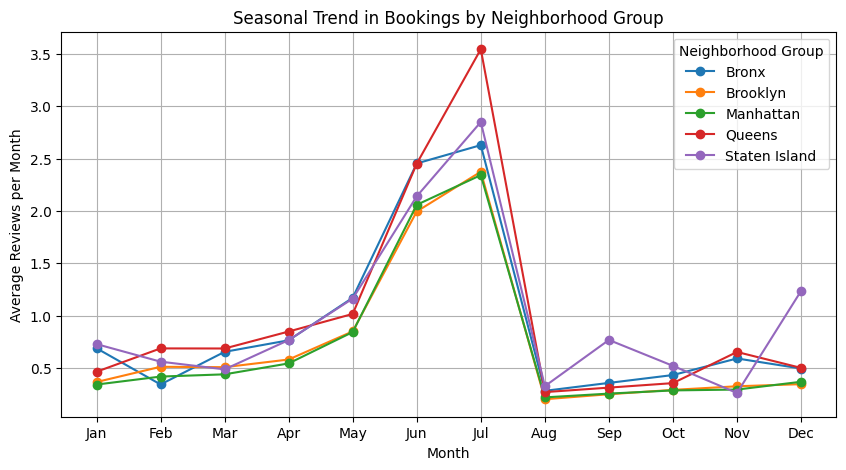

In [104]:
data_traffic = data.copy()
data_traffic["last_review"] = pd.to_datetime(data["last_review"], errors="coerce")
data_traffic["month"] = data_traffic["last_review"].dt.month


# Group by month and neighborhood_group, then calculate the average reviews_per_month
seasonal_reviews = data_traffic.groupby(["month", "neighbourhood_group"])["reviews_per_month"].mean().unstack()

# Plot the seasonal trend for each neighborhood_group
plt.figure(figsize=(10, 5))

# Loop through each neighborhood_group to plot
for neighborhood in seasonal_reviews.columns:
    plt.plot(seasonal_reviews.index, seasonal_reviews[neighborhood], marker="o", linestyle="-", label=neighborhood)

plt.xlabel("Month")
plt.ylabel("Average Reviews per Month")
plt.title("Seasonal Trend in Bookings by Neighborhood Group")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.legend(title="Neighborhood Group")
plt.show()


- The above plot shows the last review month and average rating count.
- We can see all of the neighborhoods follow similar trend with May - Aug attracting the highest traffic.
- The reason for this could be the summer season in NewYork which is often described as the best time to visit the city due to lower pricing during the time.


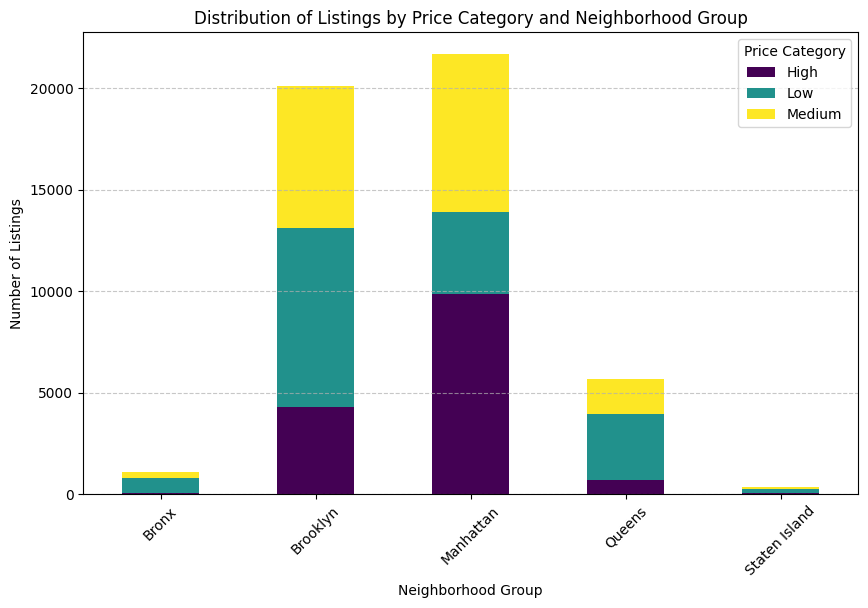

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Define thresholds for low, medium, high based on quantiles
low_threshold = data["price"].quantile(0.33)
high_threshold = data["price"].quantile(0.66)

# Categorize price into Low, Medium, and High
def categorize_price(x):
    if pd.isna(x):
        return "Unknown"
    elif x <= low_threshold:
        return "Low"
    elif x <= high_threshold:
        return "Medium"
    else:
        return "High"

data["price_category"] = data["price"].apply(categorize_price)

# Count the number of listings in each price category per neighborhood_group
price_counts = data.groupby(["neighbourhood_group", "price_category"]).size().unstack(fill_value=0)

# Plot the stacked bar chart
price_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

plt.xlabel("Neighborhood Group")
plt.ylabel("Number of Listings")
plt.title("Distribution of Listings by Price Category and Neighborhood Group")
plt.legend(title="Price Category")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



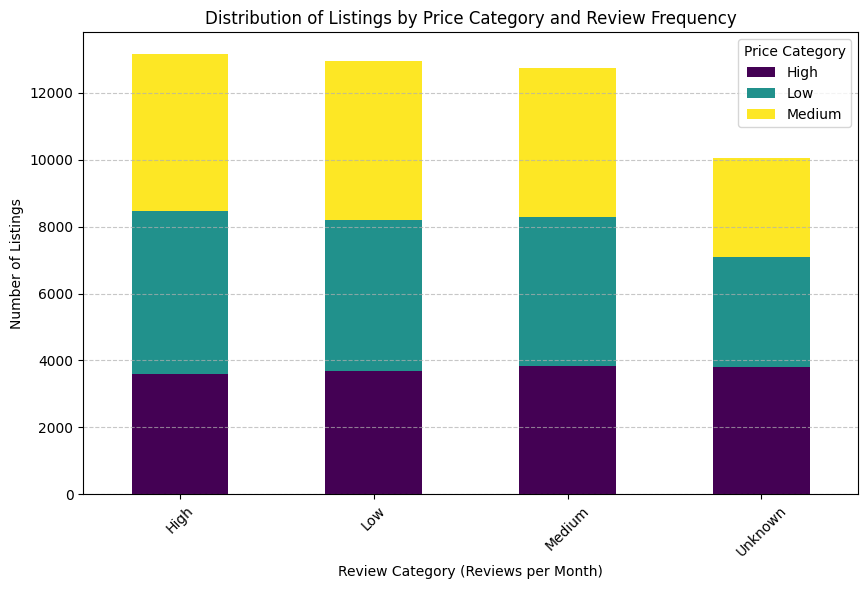

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Define thresholds for reviews_per_month (Low, Medium, High)
low_review_threshold = data["reviews_per_month"].quantile(0.33)
high_review_threshold = data["reviews_per_month"].quantile(0.66)

# Categorize reviews_per_month into Low, Medium, and High
def categorize_reviews(x):
    if pd.isna(x):
        return "Unknown"
    elif x <= low_review_threshold:
        return "Low"
    elif x <= high_review_threshold:
        return "Medium"
    else:
        return "High"

data["review_category"] = data["reviews_per_month"].apply(categorize_reviews)

# Define thresholds for price (Low, Medium, High)
low_price_threshold = data["price"].quantile(0.33)
high_price_threshold = data["price"].quantile(0.66)

# Categorize price into Low, Medium, and High
def categorize_price(x):
    if pd.isna(x):
        return "Unknown"
    elif x <= low_price_threshold:
        return "Low"
    elif x <= high_price_threshold:
        return "Medium"
    else:
        return "High"

data["price_category"] = data["price"].apply(categorize_price)

# Count the number of listings in each price category per review_category
price_counts = data.groupby(["review_category", "price_category"]).size().unstack(fill_value=0)

# Plot the stacked bar chart
price_counts.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")

plt.xlabel("Review Category (Reviews per Month)")
plt.ylabel("Number of Listings")
plt.title("Distribution of Listings by Price Category and Review Frequency")
plt.legend(title="Price Category")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


- Price doesnt affect the traffic based on the above chart analysis. 
- All price categories are ditributed almost in same fashion across different ratings per month split.

#### **Traffic to host Ratio**

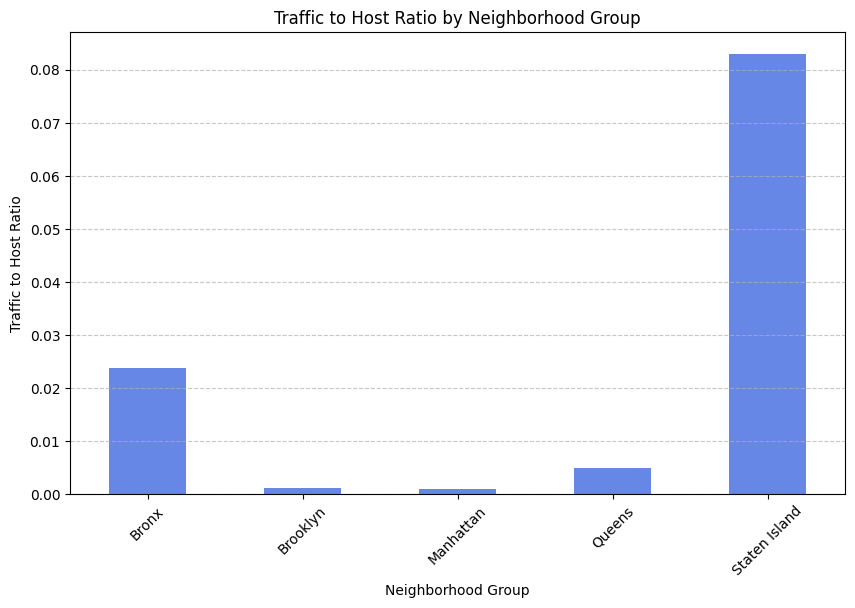

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute the average reviews_per_month for each neighborhood_group
avg_reviews = data.groupby("neighbourhood_group")["number_of_reviews"].mean()

# Count the total number of listings in each neighborhood_group
total_listings = data["neighbourhood_group"].value_counts()

# Compute the traffic to host ratio
traffic_to_host_ratio = avg_reviews / total_listings

# Plot the bar chart
plt.figure(figsize=(10, 6))
traffic_to_host_ratio.plot(kind="bar", color="royalblue", alpha=0.8)

plt.xlabel("Neighborhood Group")
plt.ylabel("Traffic to Host Ratio")
plt.title("Traffic to Host Ratio by Neighborhood Group")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


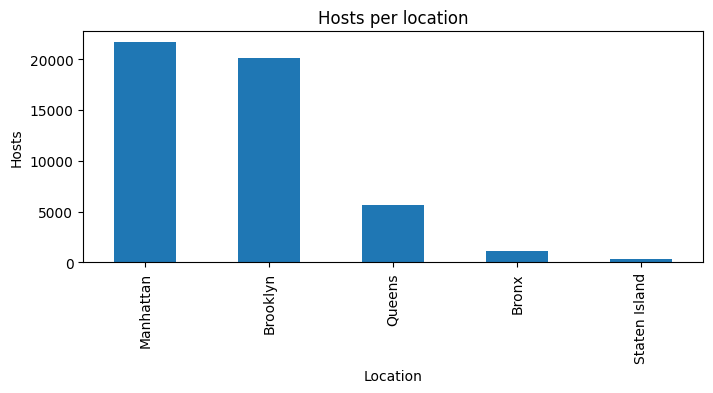

In [118]:
# Average reviews by location
plt.figure(figsize=(8, 3))
data["neighbourhood_group"].value_counts().plot(kind='bar')
plt.title("Hosts per location")
plt.xlabel("Location")
plt.ylabel("Hosts")
plt.show()

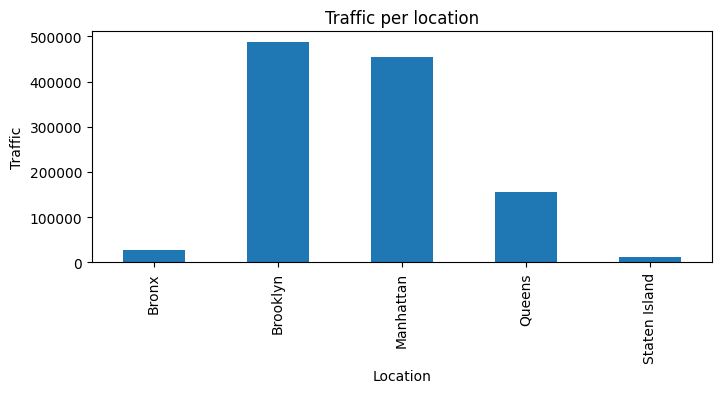

In [117]:
# Average reviews by location
plt.figure(figsize=(8, 3))
data.groupby("neighbourhood_group")["number_of_reviews"].sum().plot(kind='bar')
plt.title("Traffic per location")
plt.xlabel("Location")
plt.ylabel("Traffic")
plt.show()

- Here traffic is assumed from number of reviews. Assuming that as traffic increases number of reviews increases.
- Then we divided it by total number of listing in each neighborhood.
- This gives us the ratio of traffic : host.
- We can see the ratio is very high for Bronx and Staten Island.
- We have also seen that Manhattan and Brooklyn has the highest traffic and has the highest number of hosts as well, at the same time they have low traffic:host ratio.
- A hypothesis we can create here is that higher number of hosts attract traffic. The higher the options better traffic is pulled in. This could be an intuition which needs to be cofirmed with further data analysis.